# Лабораторная работа 3

### Выполнил: Хамитов А. гр. 9308



---



# Предварительный анализ данных

## О данных

Отдел надзора в каждой стране проводит общепринятую оценку качества питания для различных заведений общественного питания в черте города. Это ужасно хорошо заархивированная процедура.

Отдел проверки хотел бы предсказать, на чем им следует сосредоточить больше всего внимания с точки зрения их следующего плана проверки, чтобы они могли максимально оптимизировать свое время.

Может ли предыдущая оценка или любая информация, которую они собрали, предсказать, какая оценка будет успешной или нет?

Ваша цель состоит в том, чтобы предсказать, пройдет ли оценка или не пройдёт оценку, основываясь на ряде компонентов.

## Импорт необходимых библиотек

In [7]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from sklearn import preprocessing
import random
%matplotlib inline     



---



## Загрузка данных в датафрейм

Так как наш набор данных в формате csv, прочитаем его следующей функцией в pandas (опционально можно подключить гугл диск, чтобы брать датасеты из него)

In [8]:
#from google.colab import drive
#drive.mount('/content/drive')

In [9]:
df = pd.read_csv("data.csv")
# To display the top 5 rows 
df.head()               

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,0,07/08/2017,35576,27170,25928,RESTAURANT,14291,id-11235901,id_1890134,81874.0,COMPLAINT,3.0,High,locid3070,1
1,1,28/06/2016,33490,9159,8683,BAKERY,15266,id-11235901,id_1890134,81876.0,CANVASS,18.0,High,locid16348,1
2,2,06/07/2014,1716,12151,11559,RESTAURANT,10113,id-11235901,id_1890134,81886.0,CANVASS,32.0,High,locid13425,4
3,3,03/06/2015,11101,12030,11446,RESTAURANT,274,id-11235901,id_1890134,81873.0,COMPLAINT,18.0,High,locid656,1
4,4,26/02/2017,28642,21406,20451,RESTAURANT,7338,id-11235901,id_1890134,81902.0,CANVASS,34.0,High,locid12104,4


## Удаление классов из данных

In [10]:
df.Assessment_Results.value_counts()

4    75443
1    23452
5    10631
6     4998
3     2247
2      700
0       20
Name: Assessment_Results, dtype: int64

Значения каждого из классов:<br>
0 : ОБЪЕКТ ИЗМЕНЕН<br>
1 : НЕ ПРОШЕЛ<br>
2 : ТРЕБУЕТСЯ ДОПОЛНИТЕЛЬНАЯ ПРОВЕРКА<br>
3 : ПРОВЕРКА ОТМЕНЕНА<br>
4 : ПРОШЕЛ<br>
5 : ПРОЙДЕНО С НЕКОТОРЫМИ УСЛОВИЯМИ<br>
6 : ВЫКЛЮЧЕНИЕ

Можем обратить внимание на то, что категории 0, 2, 3 слишком редко встречаемые. Учитывая цель, которую мы хотим достичь - эти классы можно отбросить. 

In [11]:
df = df.drop(df[df.Assessment_Results == 4].sample(n=73000).index)
df = df.drop(df[df.Assessment_Results == 1].sample(n=11000).index)
df = df.drop(df[df.Assessment_Results == 5].sample(n=8000).index)
df = df.loc[df['Assessment_Results'].isin([1, 4, 5])]
df.Assessment_Results.value_counts()
df.head

<bound method NDFrame.head of             ID        Date  LicenseNo  Assessment_ID  Assessment_Name  \
0            0  07/08/2017      35576          27170            25928   
1            1  28/06/2016      33490           9159             8683   
3            3  03/06/2015      11101          12030            11446   
7            7  03/05/2017      33924          18109            17307   
11          11  17/09/2014      35462          16002            15266   
...        ...         ...        ...            ...              ...   
117456  117456  10/01/2011       8486           9145             8667   
117460  117460  19/07/2016      26593           1985             1802   
117468  117468  20/08/2012      34393          20869            20202   
117485  117485  08/08/2015        798          12264            11660   
117490  117490  20/04/2009      12316          18813            17982   

       Restaurent Type  Street ID      City ID    State ID  LocationID  \
0           RESTAUR

In [12]:
df.tail(5)                        # To display the botton 5 rows

,ID,Date,LicenseNo,Assessment_ID,Assessment_Name,Restaurent Type,Street ID,City ID,State ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
117456,117456,10/01/2011,8486,9145,8667,RESTAURANT,5001,id-11235901,id_1890134,81899.0,CANVASS,3.0,Medium,locid7988,5
117460,117460,19/07/2016,26593,1985,1802,RESTAURANT,13464,id-11235901,id_1890134,81901.0,CANVASS,2.0,High,locid15346,1
117468,117468,20/08/2012,34393,20869,20202,RESTAURANT,5492,id-11235901,id_1890134,81892.0,COMPLAINT,16.0,Medium,locid10560,1
117485,117485,08/08/2015,798,12264,11660,GROCERY STORE,11448,id-11235901,id_1890134,81861.0,COMPLAINT RE-INSPECTION,NaN,High,locid4727,4
117490,117490,20/04/2009,12316,18813,17982,GROCERY STORE,16332,id-11235901,id_1890134,81881.0,LICENSE RE-INSPECTION,38.0,Medium,locid2055,1




---



## Проверка типов данных

Здесь мы проверяем типы данных, потому что иногда цена автомобиля хранится в виде строки, поэтому следует преобразовать эту строку в целочисленные данные, только тогда возможно отобразить данные на графике. В данном случае данные уже представлены в целочисленном формате, поэтому беспокоиться не о чем.

In [13]:
df.dtypes

ID                         int64
Date                      object
LicenseNo                  int64
Assessment_ID              int64
Assessment_Name            int64
Restaurent Type           object
Street ID                  int64
City ID                   object
State ID                  object
LocationID               float64
Reason                    object
SectionViolations        float64
Risk_level                object
Geographical_Location     object
Assessment_Results         int64
dtype: object



---



## Удаление нерелевантных колонок

Этот шаг, в каждом анализе данных, потому что иногда в наборе данных представлены неиспользуемые столбцы, которые следует отбросить. 

In [14]:
print(df['City ID'].value_counts())
df['State ID'].value_counts()

id-11235901    17501
id-11275913       25
Name: City ID, dtype: int64


id_1890134    17520
id_1890135        6
Name: State ID, dtype: int64

In [15]:
df = df.drop(['ID', 'Assessment_ID', 'LicenseNo', 'City ID', 'State ID', 'Date'], axis=1)
df.head(5)

,Assessment_Name,Restaurent Type,Street ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,25928,RESTAURANT,14291,81874.0,COMPLAINT,3.0,High,locid3070,1
1,8683,BAKERY,15266,81876.0,CANVASS,18.0,High,locid16348,1
3,11446,RESTAURANT,274,81873.0,COMPLAINT,18.0,High,locid656,1
7,17307,SCHOOL,5609,81857.0,CANVASS,3.0,Low,locid6560,1
11,15266,RESTAURANT,11200,81886.0,CANVASS RE-INSPECTION,45.0,High,locid13631,4




---



## Переименование столбцов

В данном случае большинство названий столбцов нечитаемы, поэтому переименуем их.

In [16]:
df = df.rename(columns={"Restaurent Type": "RestaurentType"})
df.head(5)

,Assessment_Name,RestaurentType,Street ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,25928,RESTAURANT,14291,81874.0,COMPLAINT,3.0,High,locid3070,1
1,8683,BAKERY,15266,81876.0,CANVASS,18.0,High,locid16348,1
3,11446,RESTAURANT,274,81873.0,COMPLAINT,18.0,High,locid656,1
7,17307,SCHOOL,5609,81857.0,CANVASS,3.0,Low,locid6560,1
11,15266,RESTAURANT,11200,81886.0,CANVASS RE-INSPECTION,45.0,High,locid13631,4




---



## Удаление дубликатов

Большой набор данных (более 10 000 строк), часто может содержать в себе дубликаты. Например, до удаления в данном наборе было 11914 строк данных, а после удаления дубликатов 10925, таким образом набор данных содержал 989 строк дубликатов.

In [17]:
df.shape

(17526, 9)

In [18]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (468, 9)


In [19]:
df.count()      # Used to count the number of rows

Assessment_Name          17526
RestaurentType           17405
Street ID                17526
LocationID               17524
Reason                   17526
SectionViolations        15844
Risk_level               17526
Geographical_Location    17526
Assessment_Results       17526
dtype: int64

В датафрейме представлено 11914 строк, удалим 989 строк, содержащих дубликаты.

In [20]:
df = df.drop_duplicates()
df.head(5)

,Assessment_Name,RestaurentType,Street ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,25928,RESTAURANT,14291,81874.0,COMPLAINT,3.0,High,locid3070,1
1,8683,BAKERY,15266,81876.0,CANVASS,18.0,High,locid16348,1
3,11446,RESTAURANT,274,81873.0,COMPLAINT,18.0,High,locid656,1
7,17307,SCHOOL,5609,81857.0,CANVASS,3.0,Low,locid6560,1
11,15266,RESTAURANT,11200,81886.0,CANVASS RE-INSPECTION,45.0,High,locid13631,4


In [21]:
df.count()

Assessment_Name          17058
RestaurentType           16939
Street ID                17058
LocationID               17056
Reason                   17058
SectionViolations        15439
Risk_level               17058
Geographical_Location    17058
Assessment_Results       17058
dtype: int64

## Удаление пропусков

Этот шаг в основном похож на предыдущий, но здесь все отсутствующие значения определяются и отбрасываются. Также применяются тактики замены отсутствующих значений средним значением или средним значением этого столбца. В данном случае пропущено 99 значений - достаточная низкая доля всего набора данных из 10000 значений, поэтому удаление строк с пропущенными значениями не критично. 

In [22]:
print(df.isnull().sum())

Assessment_Name             0
RestaurentType            119
Street ID                   0
LocationID                  2
Reason                      0
SectionViolations        1619
Risk_level                  0
Geographical_Location       0
Assessment_Results          0
dtype: int64


In [23]:
df = df.dropna()    # Dropping the missing values.
df.count()

Assessment_Name          15421
RestaurentType           15421
Street ID                15421
LocationID               15421
Reason                   15421
SectionViolations        15421
Risk_level               15421
Geographical_Location    15421
Assessment_Results       15421
dtype: int64

Удалили все строки с пропущенными значениями (Restaurent Type и SectionViolations).

In [24]:
print(df.isnull().sum())   # After dropping the values

Assessment_Name          0
RestaurentType           0
Street ID                0
LocationID               0
Reason                   0
SectionViolations        0
Risk_level               0
Geographical_Location    0
Assessment_Results       0
dtype: int64


## Замена категориальных переменных

In [25]:
df['Risk_level'].value_counts()

High      11260
Medium     3010
Low        1151
Name: Risk_level, dtype: int64

In [26]:
num_replace = {'Risk_level': {'High': 3, 'Medium': 2, 'Low': 1}, 'Reason': {}, 'RestaurentType': {}}

freq = df['Reason'].value_counts()
for index in freq.index:
    num_replace['Reason'][index] = freq[index]
    
freq = df['RestaurentType'].value_counts()
for index in freq.index:
    num_replace['RestaurentType'][index] = freq[index]

df = df.replace(num_replace)

df.head()

,Assessment_Name,RestaurentType,Street ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,25928,10345,14291,81874.0,2351,3.0,3,locid3070,1
1,8683,272,15266,81876.0,7926,18.0,3,locid16348,1
3,11446,10345,274,81873.0,2351,18.0,3,locid656,1
7,17307,963,5609,81857.0,7926,3.0,1,locid6560,1
11,15266,10345,11200,81886.0,935,45.0,3,locid13631,4


In [27]:
# df["City ID"] = df["City ID"].str.replace(r"[^\d\.]", "", regex=True)
# df["State ID"] = df["State ID"].str.replace(r"[^\d\.]", "", regex=True)
df["Geographical_Location"] = df["Geographical_Location"].str.replace(r"[^\d\.]", "", regex=True)
df.dtypes

Assessment_Name            int64
RestaurentType             int64
Street ID                  int64
LocationID               float64
Reason                     int64
SectionViolations        float64
Risk_level                 int64
Geographical_Location     object
Assessment_Results         int64
dtype: object



---



## Определение выбросов

Выброс - это точка или набор точек, которые отличаются от других точек. Характеризуются очень высокими или очень низкими. Часто бывает полезно обнаружить и удалить выбросы. Выбросы являются одной из основных причин, приводящих к созданию менее точной модели. Метод обнаружения и удаления выбросов, примененный здесь - IQR. Часто выбросы можно увидеть с помощью визуализации, используя т.н. "ящик с усами". Ниже показаны графики MSRP, Cylinders, Horsepower и EngineSize. На всех графиках можно увидеть, что некоторые точки выходят за пределы коробки - это не что иное, как выбросы. 

In [28]:
df.head()

,Assessment_Name,RestaurentType,Street ID,LocationID,Reason,SectionViolations,Risk_level,Geographical_Location,Assessment_Results
0,25928,10345,14291,81874.0,2351,3.0,3,3070,1
1,8683,272,15266,81876.0,7926,18.0,3,16348,1
3,11446,10345,274,81873.0,2351,18.0,3,656,1
7,17307,963,5609,81857.0,7926,3.0,1,6560,1
11,15266,10345,11200,81886.0,935,45.0,3,13631,4


16.0


<AxesSubplot: xlabel='SectionViolations'>

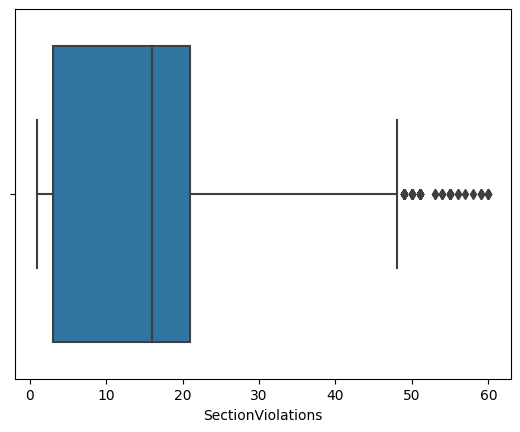

In [29]:
print(df.SectionViolations.median())
sns.boxplot(x=df['SectionViolations'])

In [30]:
columns_int = df.select_dtypes(include=["int64", "float64"])

In [31]:
for x in columns_int:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [32]:
df.isnull().sum()

Assessment_Name            0
RestaurentType             0
Street ID                  0
LocationID               100
Reason                     0
SectionViolations         73
Risk_level                 0
Geographical_Location      0
Assessment_Results         0
dtype: int64

In [33]:
df = df.dropna()
df.isnull().sum()

Assessment_Name          0
RestaurentType           0
Street ID                0
LocationID               0
Reason                   0
SectionViolations        0
Risk_level               0
Geographical_Location    0
Assessment_Results       0
dtype: int64

Как видно из вышеприведенного, около 1600 строк были пропущены. Но не получится полностью удалить выбросы, потому что даже после использования вышеописанной техники, возможно, 1-2 выброса останутся не удаленными, тем не менее, выбросов было более 100. 



---



## Нормализация данных

In [34]:
# df.loc[:, df.columns != 'Assessment_Results']
df['Geographical_Location'] = df['Geographical_Location'].astype(float)
df.dtypes

Assessment_Name          float64
RestaurentType           float64
Street ID                float64
LocationID               float64
Reason                   float64
SectionViolations        float64
Risk_level               float64
Geographical_Location    float64
Assessment_Results       float64
dtype: object

In [35]:
cdf = df
cdf = (df-df.min ())/(df.max ()-df.min ())
scaled_df = cdf

## Тепловые карты

Тепловые карты - это тип графика, который необходим для поиска зависимых переменных. Один из лучших способов найти взаимосвязь между характеристиками: тепловые карты. На приведенной ниже тепловой карте видно. что ценовая характеристика в основном зависит от мощности и года выпуска

<AxesSubplot: >

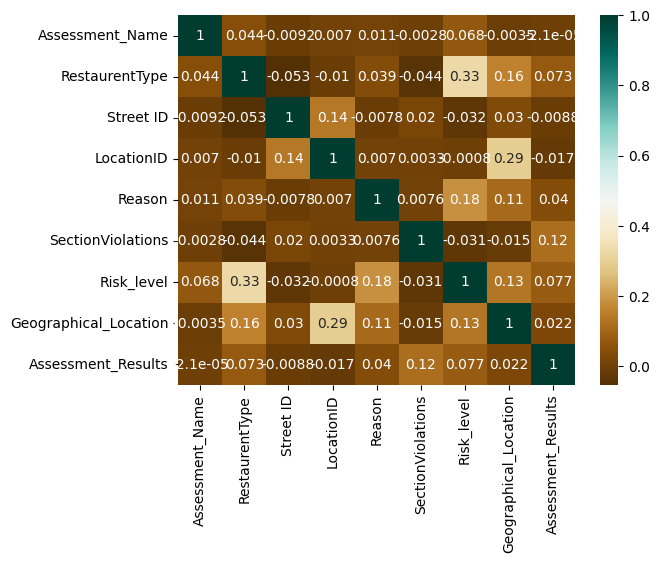

In [36]:
sns.heatmap(scaled_df.corr(),cmap="BrBG",annot=True)

## Построение моделей

In [92]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.linear_model import SGDRegressor       # линейная регрессия с градиентным спуском
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [169]:
def show_error(Y_test, Y_pred) -> str:
    print(f"r2_score: {r2_score(Y_test, Y_pred)}")
    mse = mean_squared_error(Y_test, Y_pred)
    print(f"RMSE: {np.sqrt(mse)}")
    print(f"MSE: {mse}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")
    
    fig, ax = plt.subplots(figsize=(10,10))
    sns.scatterplot(x = Y_test, y = Y_pred, alpha = 0.5)

    name = "test"
#     sns.lineplot(x = [0, 6], y = [0, 6], color=sns.husl_palette(10)[0], ax=ax)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.title('Prediction evaluation (' + name + ')', size=15)
    plt.show()

In [170]:
data_final = scaled_df

X = data_final.loc[:, data_final.columns != 'Assessment_Results']
y = df.loc[:, df.columns == 'Assessment_Results']

In [171]:
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [172]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

## Linear regress

In [173]:
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV, LinearRegression
from sklearn.linear_model import ElasticNetCV

In [174]:
y_test["Assessment_Results"].values

array([1., 1., 5., ..., 4., 4., 4.])

r2_score: 0.017579007092782595
RMSE: 1.6846676499003743
MSE: 2.8381050906208505
MAE: 1.5073780214852217


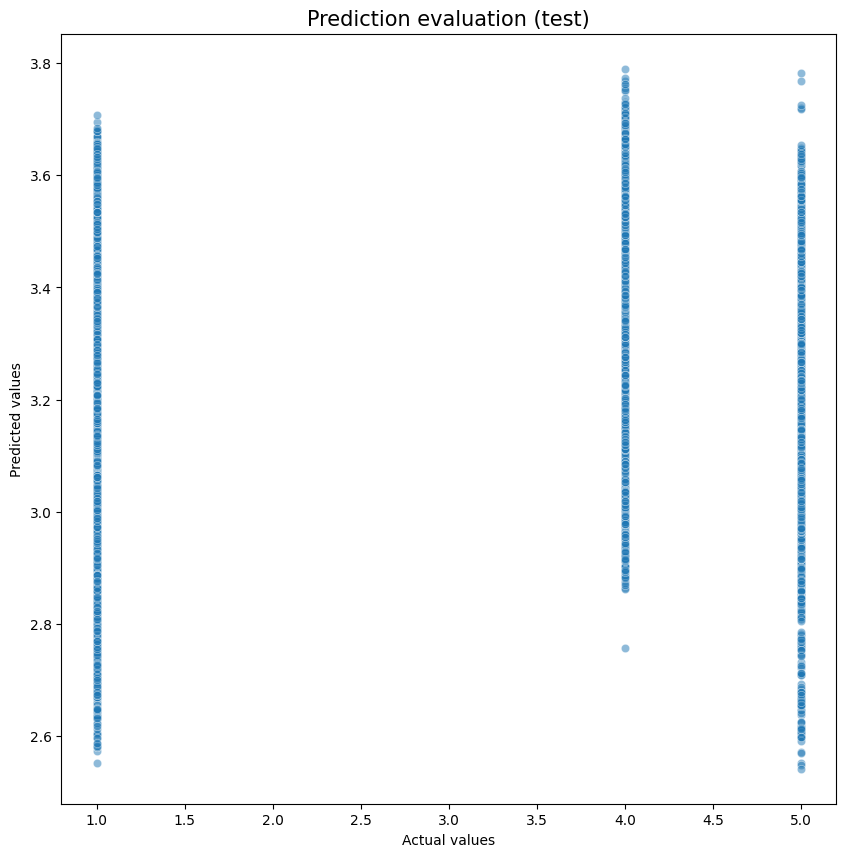

[[-0.01625931  0.2524817   0.03586747 -0.16951587  0.07932726  0.46182313
   0.42948437  0.06719328]]


In [175]:
lin = LinearRegression()
lin.fit(X_train, y_train)

lin.coef_

show_error(y_test["Assessment_Results"].values, lin.predict(X_test).ravel())
print(lin.coef_)

## Decision Tree

r2_score: 0.5268324825026225
RMSE: 1.1691571254033022
MSE: 1.3669283838813129
MAE: 0.6684289128518925


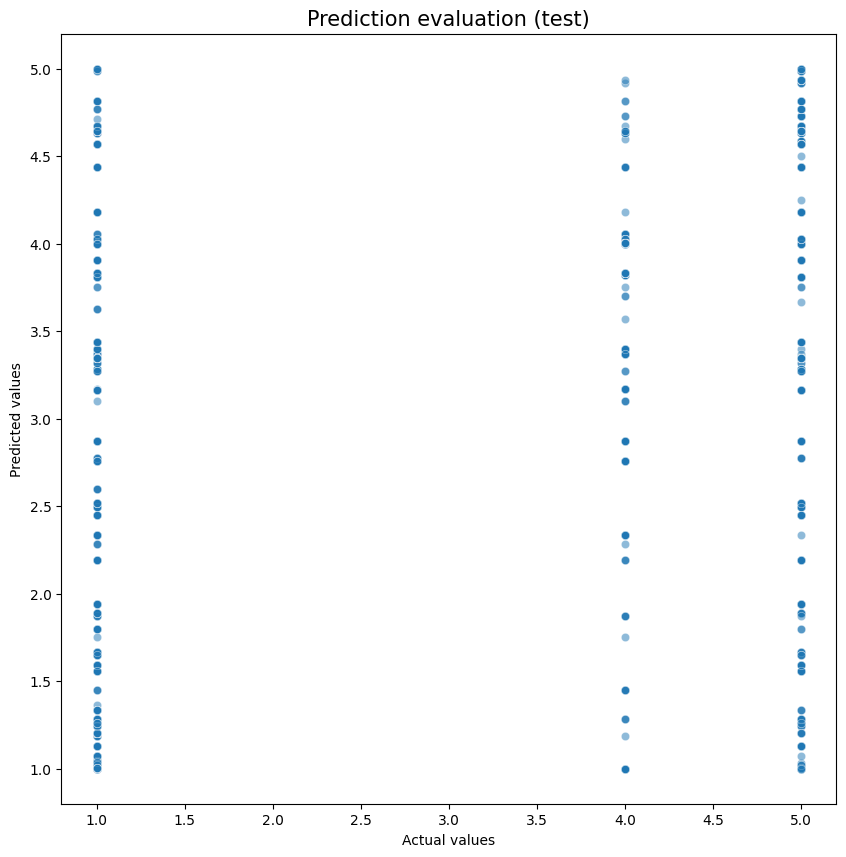

In [176]:
regr = DecisionTreeRegressor(max_depth=8)
regr.fit(X_train, y_train)

show_error(y_test["Assessment_Results"].values, regr.predict(X_test).ravel())

## LASSO

r2_score: 0.017422213403761266
RMSE: 1.6848020804138721
MSE: 2.838558050166912
MAE: 1.5090127666150785


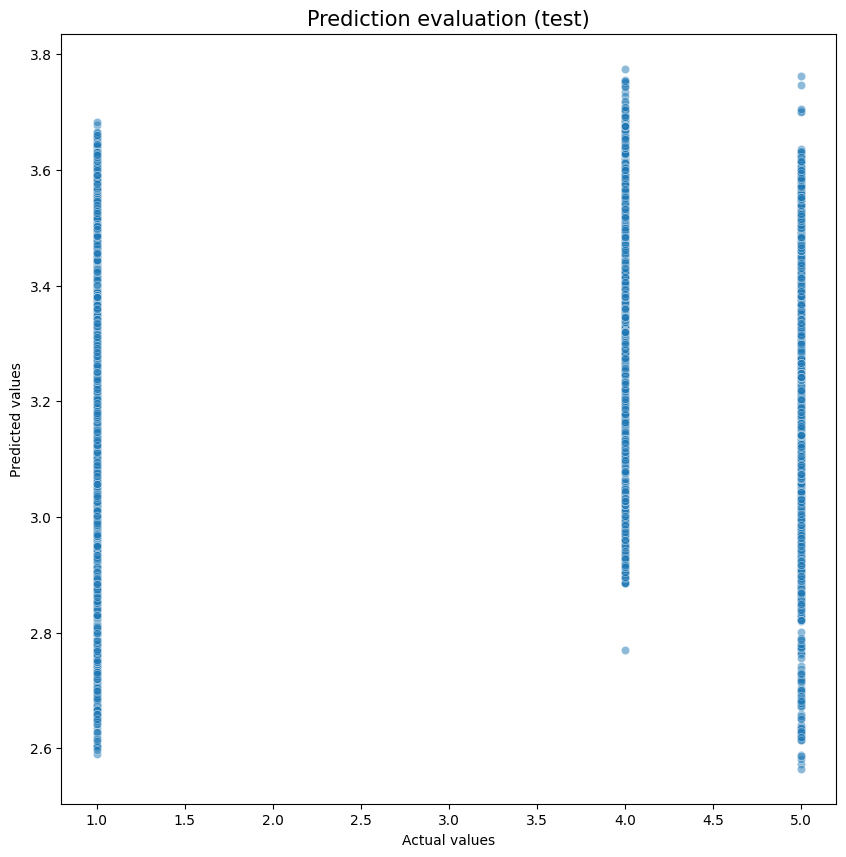

In [177]:
n_alphas = 1000
alphas = np.linspace(0.001, 200, n_alphas)
lasso_cv = LassoCV(alphas=alphas, cv=10)
lasso_cv.fit(X_train, y_train.values.ravel())

show_error(y_test["Assessment_Results"].values, lasso_cv.predict(X_test).ravel())


## Ridge

r2_score: 0.017579789885694974
RMSE: 1.6846669787287645
MSE: 2.8381028292191037
MAE: 1.5074098521833044


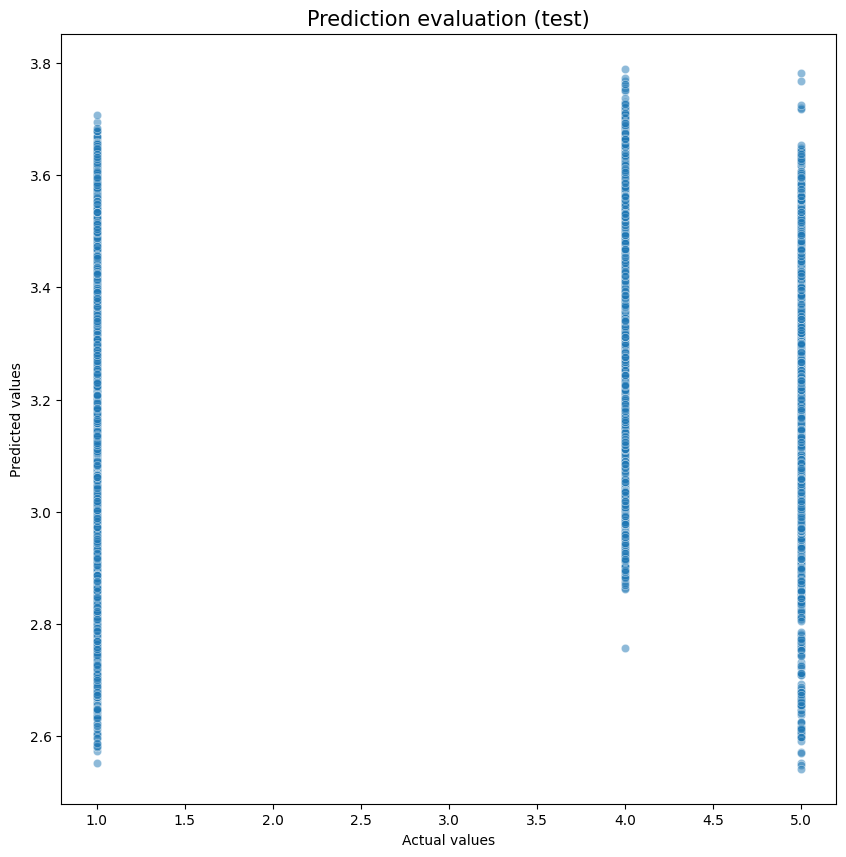

In [178]:
n_alphas = 100
ridge_alphas = np.logspace(0.1, 200, n_alphas)
ridge_cv = RidgeCV(alphas=ridge_alphas, scoring="neg_mean_squared_error", cv=5)
ridge_cv.fit(X_train, y_train)

show_error(y_test["Assessment_Results"].values, ridge_cv.predict(X_test).ravel())

## XGBoost

[14:00:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
r2_score: 0.6047911916311853
RMSE: 1.0685103346658313
MSE: 1.1417143352876868
MAE: 0.7264942054333345


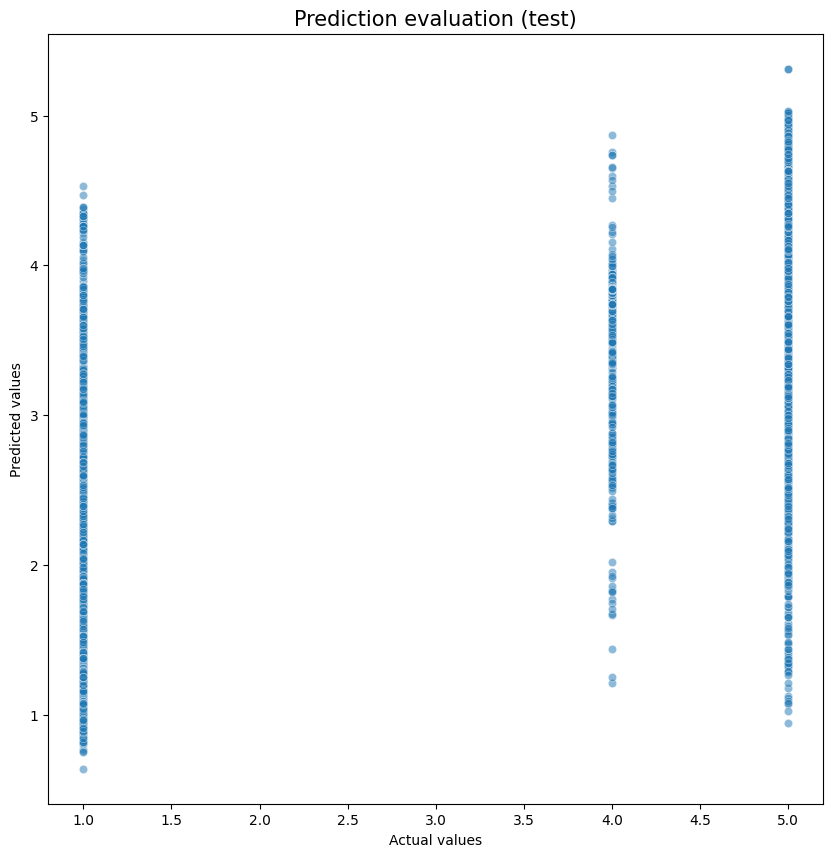

In [179]:
xgb = XGBRegressor(n_estimators=30, max_depth=7)
xgb.fit(X_train, y_train)

show_error(y_test["Assessment_Results"].values, xgb.predict(X_test).ravel())

## ElasticNet

r2_score: 0.0
RMSE: 1.699673171197595
MSE: 2.888888888888889
MAE: 1.5555555555555554


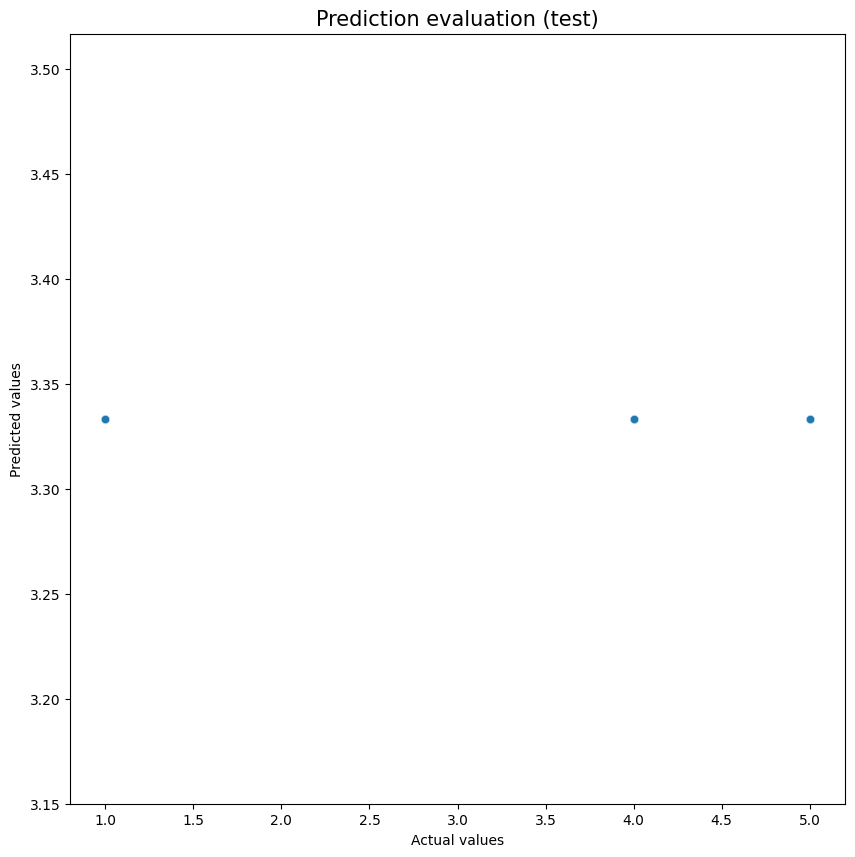

In [180]:
elastic_alphas = np.logspace(0.1, 200, n_alphas)
elastic = ElasticNetCV(alphas=elastic_alphas, cv=5, random_state=17)
elastic.fit(X_train,y_train.values.ravel())

show_error(y_test["Assessment_Results"].values, elastic.predict(X_test).ravel())